## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

คุณสามารถใช้ไฟล์ .csv ที่ให้มาหรือ (ตามที่ต้องการ) รับข้อมูลใหม่ (ข้อมูลล่าสุด?) จากการรันคำสั่ง SQL บน StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

ให้คลิกที่ลิงก์นี้เพื่อรันคำสั่งจาก [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) เพื่อรับไฟล์ .csv ของคุณเอง

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd 

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

**Challenge**: อ่านไฟล์ .csv และเก็บข้อมูลไว้ใน Pandas dataframe

In [8]:
df = pd.read_csv("./QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)

df

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

**Challenge**: ตรวจสอบแถว 5 แถวแรกและ 5 แถวสุดท้ายของ DataFrame

In [10]:
df.tail(5)

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [9]:
df.head(5)

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?


**Challenge:** ตรวจสอบว่ามีกี่แถวและมีกี่คอลัมน์บนตารางข้อมูลนี้ ขนาดของ DataFrame คืออะไร

In [11]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

**Challenge:** ตรวจสอบว่ามีแถวกี่แถวและมีคอลัมน์กี่คอลัมน์ ขนาดของ DataFrame คืออะไร?

In [7]:
df.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

**Challenge**: คำนวณจำนวนโพสต์รวมต่อภาษา ภาษาโปรแกรมใดมีจำนวนโพสต์รวมสูงที่สุดในทุกเวลา?

In [13]:
df.groupby("TAG").sum(numeric_only=True).sort_values("POSTS", ascending=False)

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

บางภาษาเป็นภาษาที่เก่ากว่า (เช่น C) และภาษาอื่น ๆ เป็นภาษาที่ใหม่ (เช่น Swift) ชุดข้อมูลเริ่มต้นในเดือนกันยายน ค.ศ. 2008


**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 

**Challenge**: มีข้อมูลเป็นเดือนกี่เดือนต่อภาษา? ภาษาใดมีเดือนน้อยที่สุดที่มีรายการ?

In [14]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

เรามาแก้รูปแบบของวันที่เพื่อทำให้เห็นภาพได้ชัดเจนขึ้น จะต้องใช้ Pandas เพื่อเปลี่ยนรูปแบบจากสตริง "2008-07-01 00:00:00" เป็นอ็อบเจ็กต์ datetime ด้วยรูปแบบ "2008-07-01"

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    1991 non-null   object
 1   TAG     1991 non-null   object
 2   POSTS   1991 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 46.8+ KB


In [17]:
df.DATE = pd.to_datetime(df.DATE)
df.head(2)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    1991 non-null   datetime64[ns]
 1   TAG     1991 non-null   object        
 2   POSTS   1991 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 46.8+ KB


## Data Manipulation



Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df. 

คุณสามารถทำการ Pivot ตารางข้อมูล DataFrame ให้แต่ละแถวเป็นวันที่และแต่ละคอลัมน์เป็นภาษาโปรแกรม โดยเก็บผลลัพธ์ไว้ในตัวแปรชื่อ "reshaped_df" ได้

In [19]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df = reshaped_df.fillna(0)



reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

**Challenge**: dimensions ของ DataFrame ใหม่ของเราคืออะไร? มีกี่แถวและคอลัมน์? พิมพ์ชื่อคอลัมน์ออกมาและพิมพ์แถว 5 แถวแรกของ DataFrame ออกมาด้วย

In [20]:
reshaped_df.shape

(145, 14)

In [22]:
reshaped_df.index

DatetimeIndex(['2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01', '2009-01-01', '2009-02-01',
               '2009-03-01', '2009-04-01',
               ...
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01'],
              dtype='datetime64[ns]', name='DATE', length=145, freq=None)

In [21]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

**Challenge**: นับจำนวนรายการต่อภาษาโปรแกรม ทำไมจำนวนรายการถึงอาจแตกต่างกันได้?

In [23]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

**Challenge**: ใช้ [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) เพื่อ plot ภาษาโปรแกรมเดียว (เช่น java) บนกราฟ

In [25]:
import matplotlib.pyplot as plt

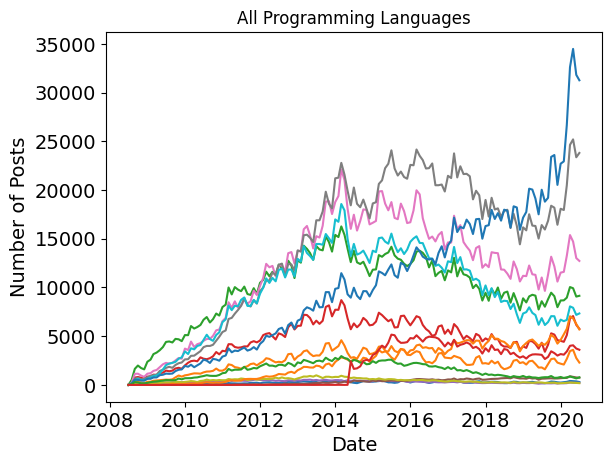

In [39]:
reshaped_df.index #X
reshaped_df.java #Y

plt.title("All Programming Languages")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)


# plt.plot(reshaped_df.index, reshaped_df.java)
# plt.plot(reshaped_df.index, reshaped_df.c)

for column in reshaped_df.columns :
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)

# plt.legend(fontsize=12)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

**Challenge**: แสดงเส้นสองเส้น (เช่น Java และ Python) บนกราฟเดียวกันครับ

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 


ข้อมูลแบบ Time series อาจมี noise มาก โดยมีการแปลงขึ้นและลงบ่อย ๆ ในการเห็นแนวโน้มได้ดีขึ้นเราสามารถพล็อตค่าเฉลี่ยของข้อมูลในระยะเวลาที่กำหนดได้ เช่น 6 หรือ 12 การสังเกตนี้เรียกว่า "rolling mean" โดยเราคำนวณค่าเฉลี่ยใน window of time และขยับไปข้างหน้าอีกหนึ่งการสังเกต Pandas มี methods 2 ตัว ที่มีประโยชน์สำหรับการทำนี้อยู่แล้ว : [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) และ [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [40]:
roll_df = reshaped_df.rolling(window=6).mean()

roll_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,296.000000,2431.000000,8807.000000,4851.166667,168.666667,687.000000,12050.000000,18252.000000,200.833333,6681.166667,23304.000000,4969.333333,780.000000,3238.000000
2020-04-01,305.500000,2567.000000,8903.500000,5105.333333,183.333333,721.666667,12420.166667,19293.333333,204.833333,6848.333333,24838.500000,5288.000000,771.166667,3332.166667
2020-05-01,316.000000,2716.833333,9040.166667,5421.500000,190.166667,749.500000,12844.500000,20461.500000,203.666667,6993.333333,26653.166667,5614.166667,779.166667,3465.666667


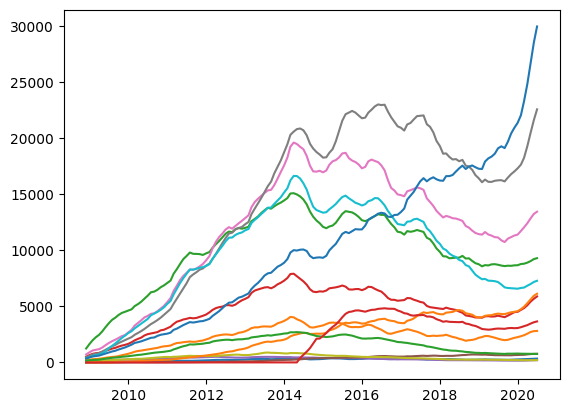

In [43]:

# plt.plot(reshaped_df.index, reshaped_df.java)
# plt.plot(reshaped_df.index, reshaped_df.c)

for column in roll_df.columns :
    plt.plot(roll_df.index, roll_df[column], label=roll_df[column].name)

# plt.legend(fontsize=16)